In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("/content/CO2 Emissions_Canada.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data_duplicated = data[data.duplicated() == True]
data.duplicated().sum()
data_duplicated.info()
data_duplicated.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 1075 to 7368
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              1103 non-null   object 
 1   Model                             1103 non-null   object 
 2   Vehicle Class                     1103 non-null   object 
 3   Engine Size(L)                    1103 non-null   float64
 4   Cylinders                         1103 non-null   int64  
 5   Transmission                      1103 non-null   object 
 6   Fuel Type                         1103 non-null   object 
 7   Fuel Consumption City (L/100 km)  1103 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   1103 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  1103 non-null   float64
 10  Fuel Consumption Comb (mpg)       1103 non-null   int64  
 11  CO2 Emissions(g/km)               1103 non-null   int64  
dtypes: float

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,3.150136,5.592928,12.250771,8.877244,10.731278,27.883953,247.320943
std,1.290098,1.723181,3.167129,1.877191,2.548472,7.144804,53.778250
min,1.200000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000
25%,2.000000,4.000000,10.000000,7.600000,8.950000,23.000000,209.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,247.000000
75%,3.600000,6.000000,14.200000,10.000000,12.300000,31.500000,284.000000
max,8.000000,16.000000,26.800000,16.600000,22.200000,69.000000,522.000000


Visualizing the data

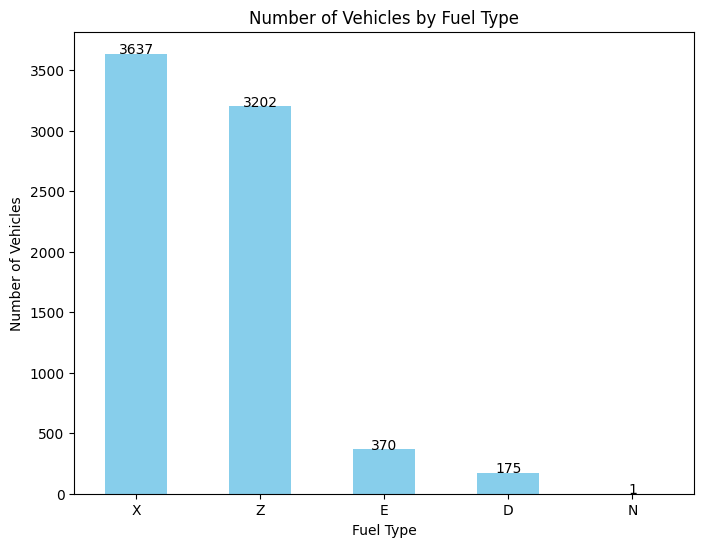

In [6]:
fuel_type_counts = data['Fuel Type'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
ax = fuel_type_counts.plot(kind='bar', color='skyblue')
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
for i, count in enumerate(fuel_type_counts):
    ax.text(i, count + 0.1, str(count), ha='center')
plt.show()

In [7]:
data_Make = data['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Make'})[0:25]

fig = go.Figure(go.Bar(x=data_Make['Make'],y=data_Make['count'],
                marker={'color': data_Make['count'],
                'colorscale': 'Plasma'},
                text=data_Make['count'],
                textposition = "outside"))
fig.update_layout(title_text='Top 25 Companies',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [8]:
fig = px.histogram(data, x="Cylinders")
fig.update_traces(text=fig.data[0].y, textposition='outside')
fig.update_layout(
    title='Distribution Of Cylinders',
    xaxis_title='Cylinders',
    yaxis_title='Number Of Vehicles',
    title_x=0.5
)
fig.show()

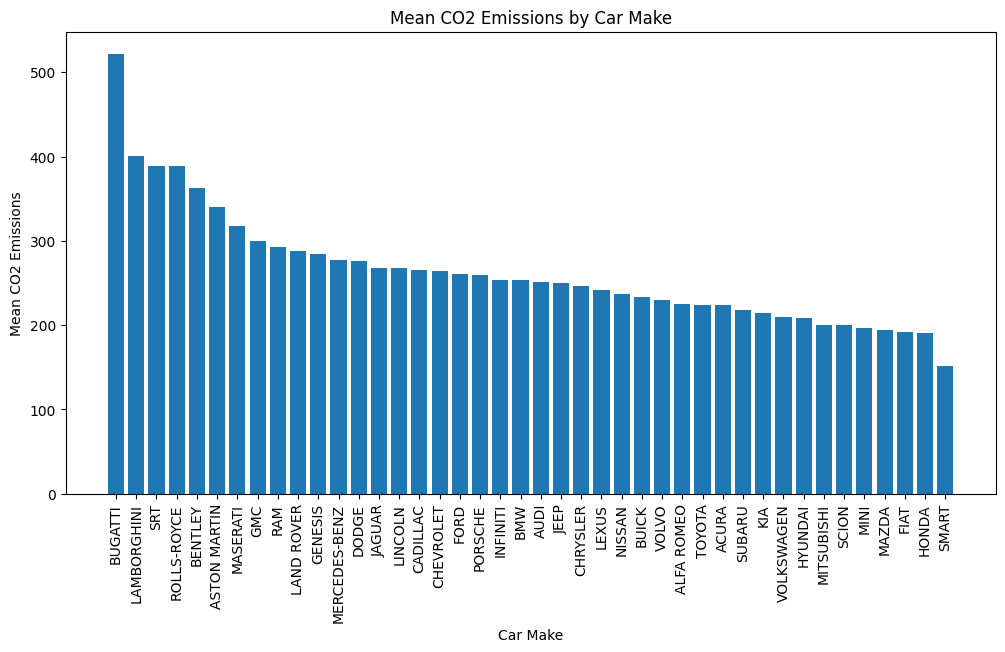

In [9]:
plt.figure(figsize = (12, 6))
mean_data_by_make = data.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)
plt.bar(mean_data_by_make.index, mean_data_by_make) # the indexes are the unique car makes
plt.title("Mean CO2 Emissions by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Mean CO2 Emissions")
plt.xticks(rotation = 90)  # rotate x-axis labels
plt.show()

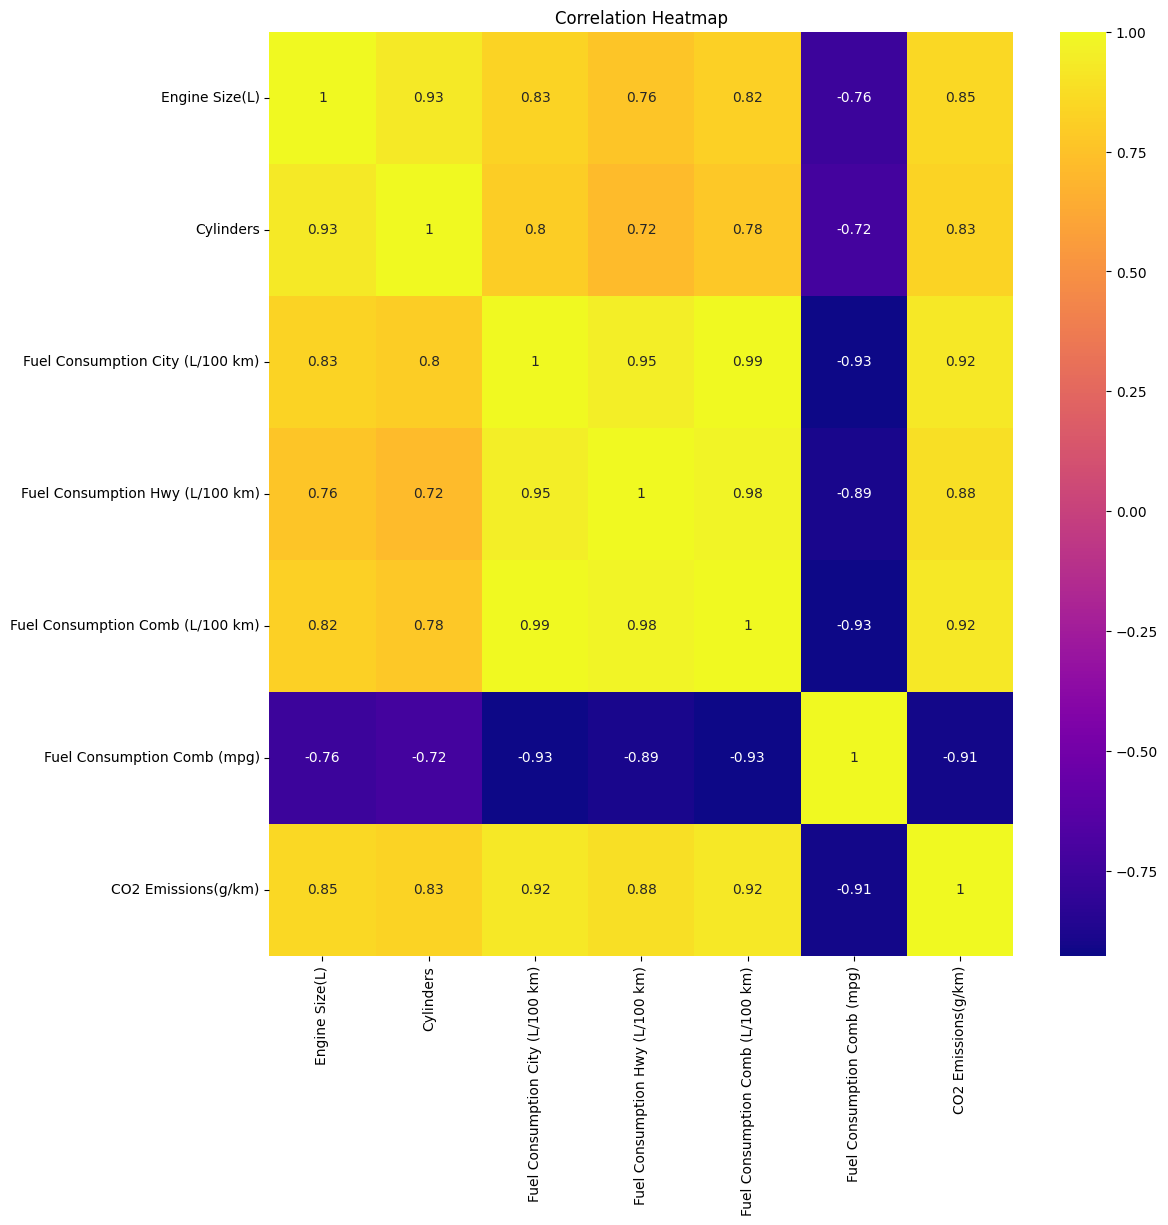

In [10]:
# heatmap to see the correlations between numeric values
numeric_columns = data.select_dtypes(exclude=['object'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, cmap = 'plasma', annot = True)
plt.title('Correlation Heatmap')
plt.show()

All features seem to have a strong correlation to CO2 emissions

In [11]:
data.describe(include=['O'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


Determining if the data is normally distributed

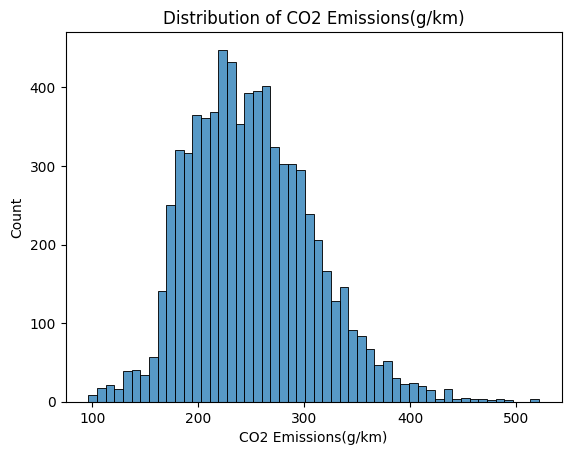

In [12]:
sns.histplot(x = data['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)')
plt.show()

The data aappears to be normally distributed. There are some outliers

In [13]:
Q1 = data['CO2 Emissions(g/km)'].quantile(0.25)
Q3 = data['CO2 Emissions(g/km)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR   # can adjust these multipliers
upper_bound = Q3 + 1.5 * IQR

result = data[(data['CO2 Emissions(g/km)'] >= lower_bound) & (data['CO2 Emissions(g/km)'] <= upper_bound)]

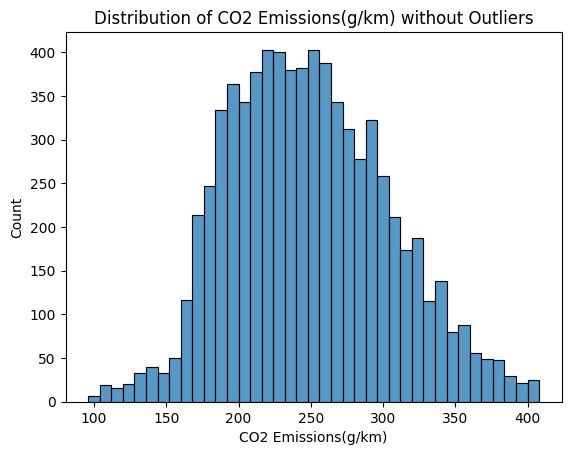

In [14]:
sns.histplot(x=result['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km) without Outliers')
plt.show()

With this, we have removed some outliers using the Interquartile Range method.

In [15]:
data_encoded = pd.get_dummies(result, columns=['Vehicle Class', 'Transmission', 'Fuel Type'], drop_first=True)
data_encoded.head()

,Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_FULL-SIZE,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,ACURA,ILX,2.0,4,9.9,6.7,8.5,33,196,False,...,False,False,False,False,False,False,False,False,False,True
1,ACURA,ILX,2.4,4,11.2,7.7,9.6,29,221,False,...,False,False,False,False,True,False,False,False,False,True
2,ACURA,ILX HYBRID,1.5,4,6.0,5.8,5.9,48,136,False,...,False,True,False,False,False,False,False,False,False,True
3,ACURA,MDX 4WD,3.5,6,12.7,9.1,11.1,25,255,False,...,False,False,False,False,False,False,False,False,False,True
4,ACURA,RDX AWD,3.5,6,12.1,8.7,10.6,27,244,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
data_encoded = data_encoded.drop(['Make', 'Model'], axis=1)

Creating the LinearRegression model now

In [17]:
X = data_encoded.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = data_encoded['CO2 Emissions(g/km)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
model.score(X_train, y_train)

Mean Squared Error: 10.075294593902003
Root Mean Squared Error: 3.1741604549710467
R-squared: 0.9968135030986904


0.9938057684594671

Mean Squared Error (MSE): The MSE of approximately 22.85 indicates that the model's predictions are relatively close to the actual values

RMSE of approximately 4.78 is the square root of the MSE and represents the average magnitude of the errors, so lower is better

R-squared value of approximately 0.99 indicates that the model explains about 99% of the variance which suggests that the model fits the data very well.

Model score of approximately 0.993 on the *training data* indicates the coefficient of determination (R-squared) of the prediction. It is also high, indicating that the model is performing well on the *training data*

Using KNN:

In [20]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # 5 for now
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
knn_regressor.score(X_train, y_train)

Mean Squared Error: 20.255660506502405
Root Mean Squared Error: 4.500628901220629
R-squared: 0.9935937754636958


0.9949452566652374

Using Support Vector Machines (SVM)

In [22]:
svm_regressor = SVR(kernel='linear')

svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [23]:
y_pred = svm_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
svm_regressor.score(X_train, y_train)

Mean Squared Error: 41.526444232467746
Root Mean Squared Error: 6.444101506995971
R-squared: 0.9868664995712133


0.9884023039881944

Using Random Forest

In [24]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = random_forest_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
random_forest_regressor.score(X_train, y_train)

Mean Squared Error: 10.075294593902003
Root Mean Squared Error: 3.1741604549710467
R-squared: 0.9968135030986904


0.9992037971809337

Linear Regression and Random Forest: Both achieved the best performance with a Mean Squared Error (MSE) of approximately 10 and a Root Mean Squared Error (RMSE) around 3.17. Their R-squared values were also exceptionally high, exceeding 0.996, indicating a very strong correlation between the predicted and actual CO2 emissions.
KNN: Performed well with an MSE of 20.26 and an R-squared of 0.993, suggesting a good fit for the data. However, its RMSE (4.50) was slightly higher compared to Linear Regression and Random Forest.
SVM: Performed the least favorably among the evaluated models. While its R-squared remained high at 0.987, the MSE reached 41.53 and the RMSE was 6.44, indicating a larger prediction error compared to the other models.